
# Project: Investigate a Dataset - [Suicide Rates Overview 1985 to 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

<a id='wrangling'></a>
## Data Wrangling


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import re

In [2]:
# Loading the data:

df = pd.read_csv("master.csv")

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Check the number of rows and colunms we have in the dataset:

df.shape

(27820, 12)

In [4]:
# Getting information about the dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# Check for missing values:

df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

As we see above, we have some missing values in the "HDI for year" column, we we handle this column in the cleaning part.

In [6]:
# Check for duplicated values:

df.duplicated().sum()

0


### Data Cleaning
 

In [7]:
df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [8]:
# Fisrt we will drop the "HDI for year" column:
df.drop(columns="HDI for year", axis=1, inplace=True)

In [9]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
# Check the values in the "age" column
df['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [11]:
# We will drop the "country-year" column:
df.drop(columns="country-year", axis=1, inplace=True)

df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.1+ MB


In [13]:
# Handling the "gdp_for_year" column and converting it to integer

df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '')
df["gdp_for_year ($)"] = df["gdp_for_year ($)"].astype("int64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   gdp_for_year ($)    27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [15]:
df.to_csv('suicides_data_1.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the top 15 countries with highest suicides numbers?)

In [16]:
df.head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X


In [17]:
con_grp = df.groupby("country")
suicides_agg = con_grp["suicides_no"].sum()

suicides_agg = suicides_agg.reset_index()
suicides_agg.head(2)

,country,suicides_no
0,Albania,1970
1,Antigua and Barbuda,11


In [18]:
con_suicides = suicides_agg.nlargest(15,"suicides_no")

con_suicides.head(2)

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013


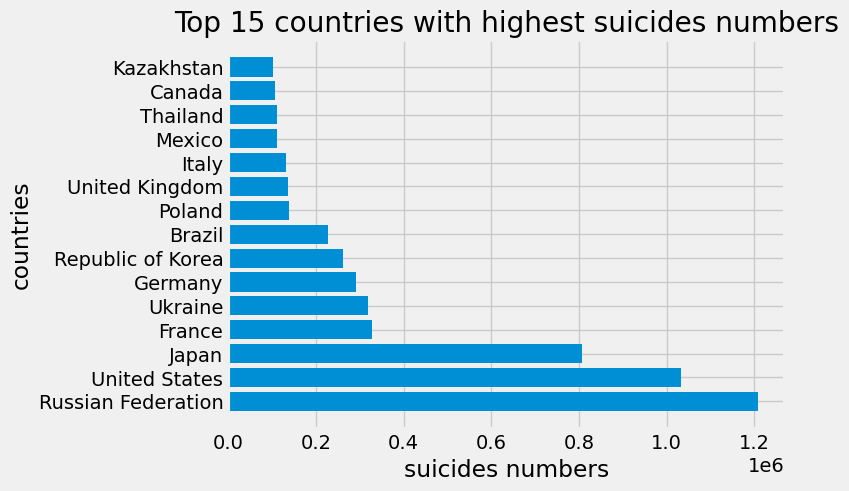

In [19]:
plt.barh(con_suicides["country"], con_suicides["suicides_no"])
plt.title("Top 15 countries with highest suicides numbers")
plt.xlabel("suicides numbers")
plt.ylabel("countries");

### Research Question 2 (What are the top 15 countries with lowest suicides numbers?)

In [20]:
suicides_agg2 = con_grp["suicides_no"].sum()

suicides_agg2 = suicides_agg2.reset_index()

In [21]:
con_suicides2 = suicides_agg2.nsmallest(15,"suicides_no")

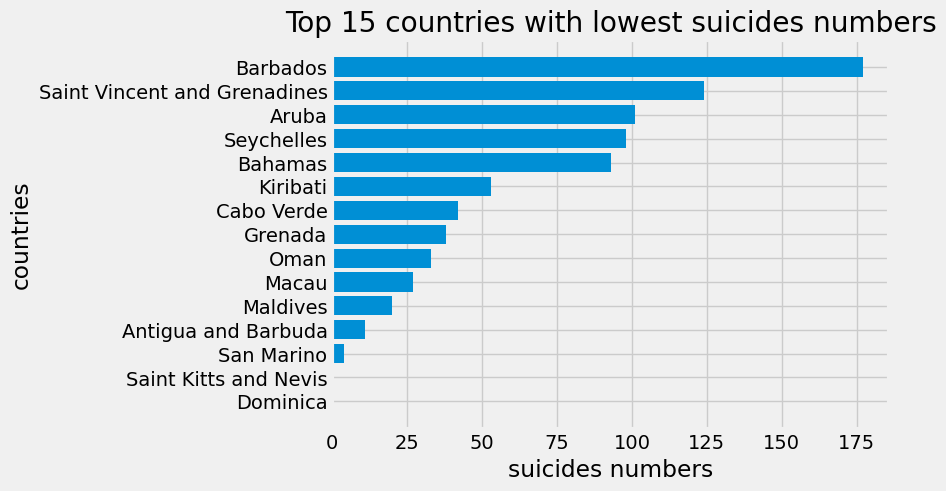

In [22]:
plt.barh(con_suicides2["country"], con_suicides2["suicides_no"])
plt.title("Top 15 countries with lowest suicides numbers")
plt.xlabel("suicides numbers")
plt.ylabel("countries");

### Research Question 3 (What are the top 15 countries with highest population numbers?)

In [23]:
df.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent


In [24]:
pop_agg = con_grp["population"].sum()
pop_agg = pop_agg.reset_index()

con_pop = pop_agg.nlargest(15,"population")

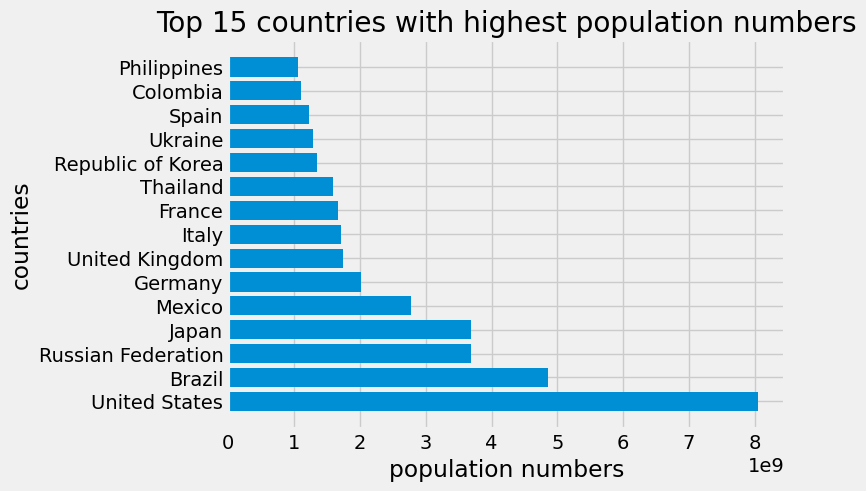

In [25]:
plt.barh(con_pop["country"], con_pop["population"])
plt.title("Top 15 countries with highest population numbers")
plt.xlabel("population numbers")
plt.ylabel("countries");

### Research Question 4 (What are the top 15 countries with highest Gross domestic product "GDP"?)

In [26]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [27]:
gdp_agg = con_grp["gdp_for_year ($)"].sum()
gdp_agg = gdp_agg.reset_index()

gdp_con = gdp_agg.nlargest(15,"gdp_for_year ($)")

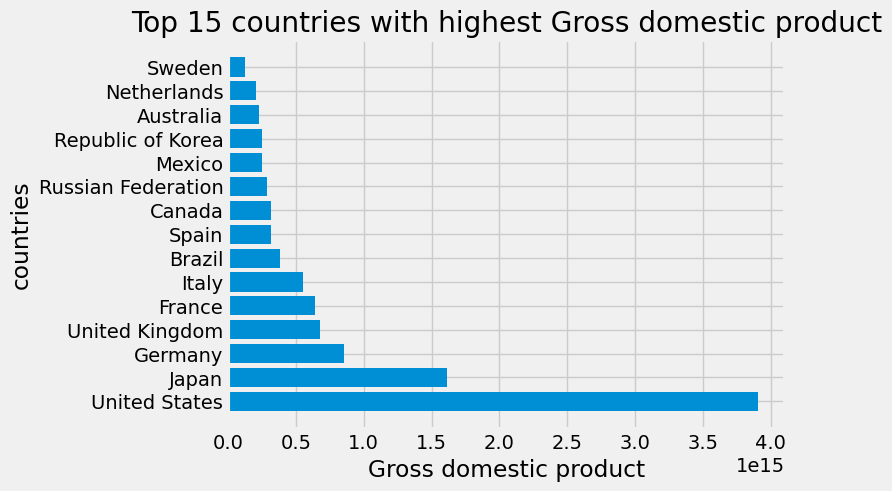

In [28]:
plt.barh(gdp_con["country"], gdp_con["gdp_for_year ($)"])
plt.title("Top 15 countries with highest Gross domestic product")
plt.xlabel("Gross domestic product")
plt.ylabel("countries");

### Research Question 5 (What are the top 15 countries with highest Gross domestic product per capita?)

In [29]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [30]:
gdp_agg1 = con_grp["gdp_per_capita ($)"].sum()
gdp_agg1 = gdp_agg1.reset_index()

gdp_con1 = gdp_agg1.nlargest(15,"gdp_per_capita ($)")

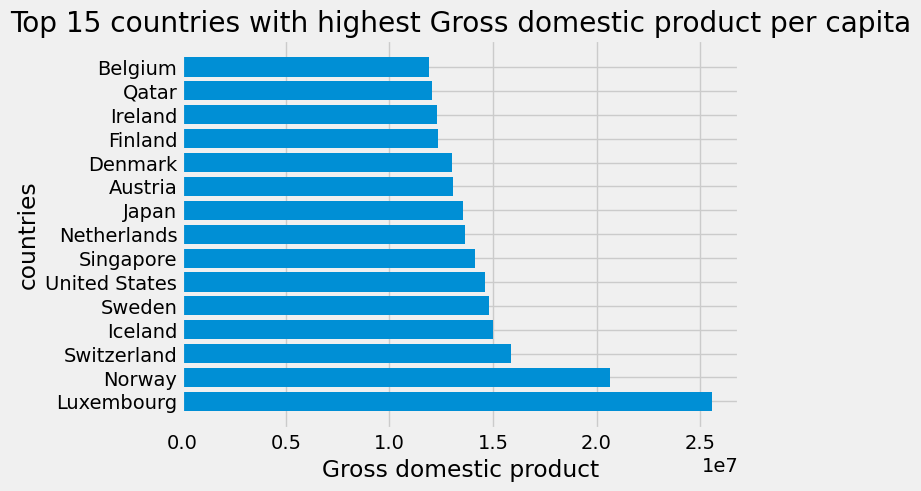

In [31]:
plt.barh(gdp_con1["country"], gdp_con1["gdp_per_capita ($)"])
plt.title("Top 15 countries with highest Gross domestic product per capita")
plt.xlabel("Gross domestic product")
plt.ylabel("countries");

### Research Question 6 (What are the top 10 years with highest suicides numbers?)

In [32]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [33]:
year_grp = df.groupby("year")

year_agg = year_grp["suicides_no"].sum()
year_agg = year_agg.reset_index()

In [34]:
suci_year = year_agg.nlargest(10,"suicides_no")

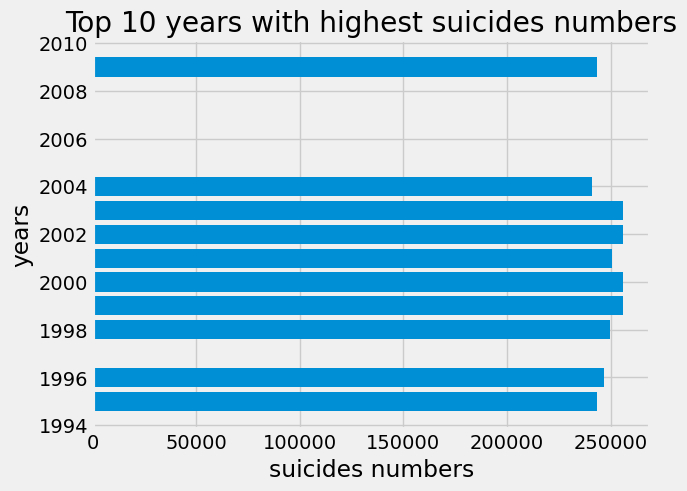

In [35]:
plt.barh(suci_year["year"], suci_year["suicides_no"])
plt.title("Top 10 years with highest suicides numbers")
plt.xlabel("suicides numbers")
plt.ylabel("years");

### Research Question 7 (What is the number of suicide cases for each gender?)

In [36]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [37]:
gen_grp = df.groupby("sex")

gen_agg = gen_grp["suicides_no"].sum()
gen_agg = gen_agg.reset_index()

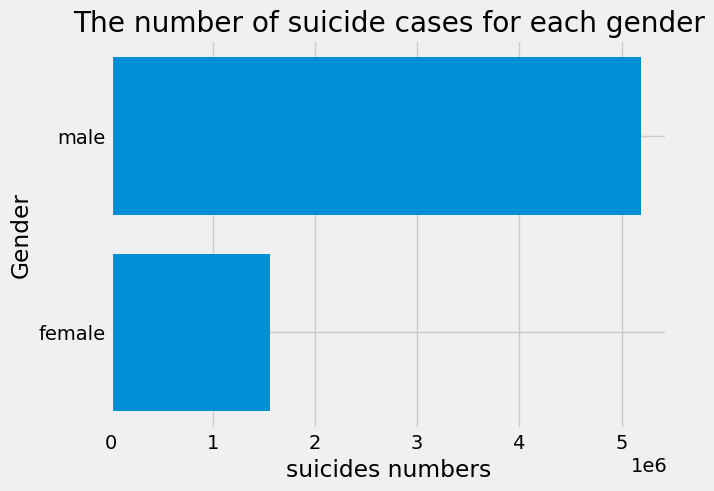

In [38]:
plt.barh(gen_agg["sex"], gen_agg["suicides_no"])
plt.title("The number of suicide cases for each gender")
plt.xlabel("suicides numbers")
plt.ylabel("Gender");

### Research Question 8 (What is the number of suicide cases for each age group?)

In [39]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [40]:
age_grp = df.groupby("age")

age_agg = age_grp["suicides_no"].sum()
age_agg = age_agg.reset_index()

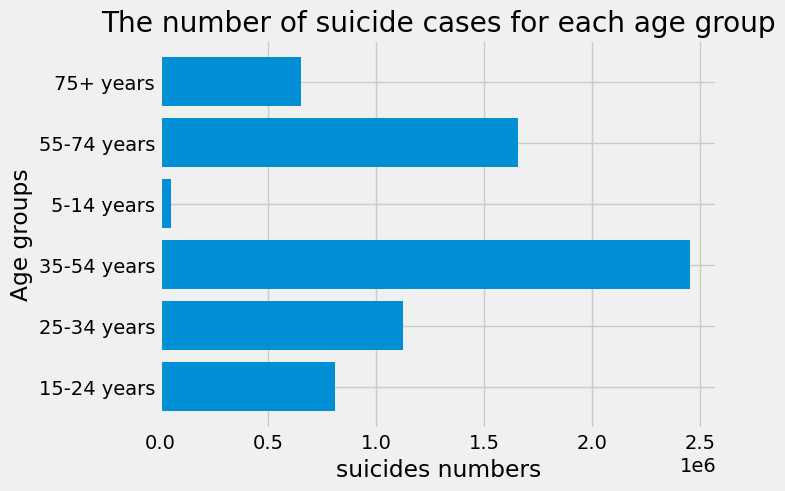

In [41]:
plt.barh(age_agg["age"], age_agg["suicides_no"])
plt.title("The number of suicide cases for each age group")
plt.xlabel("suicides numbers")
plt.ylabel("Age groups");

### Research Question 9 (What is the number of suicide cases for each generation?)

In [42]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [43]:
gen_grp = df.groupby("generation")

gen_agg = gen_grp["suicides_no"].sum()
gen_agg = gen_agg.reset_index()

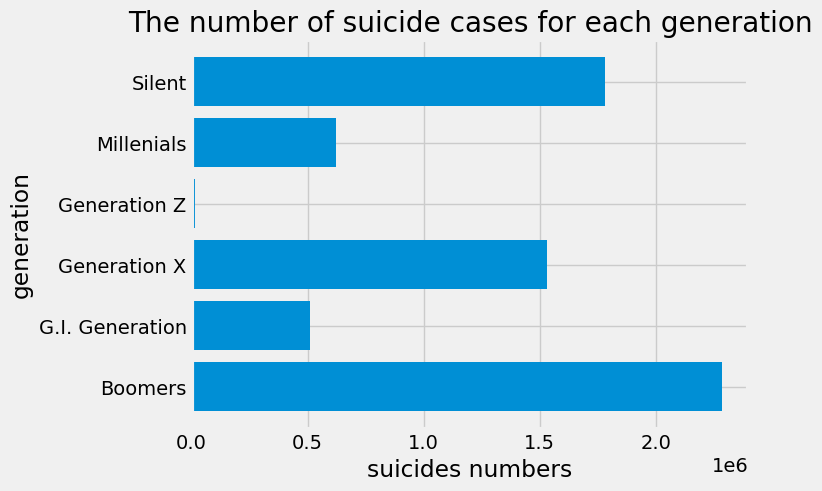

In [44]:
plt.barh(gen_agg["generation"], gen_agg["suicides_no"])
plt.title("The number of suicide cases for each generation")
plt.xlabel("suicides numbers")
plt.ylabel("generation");

### Research Question 10 (Does GDP affect the number of suicides?)

In [45]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

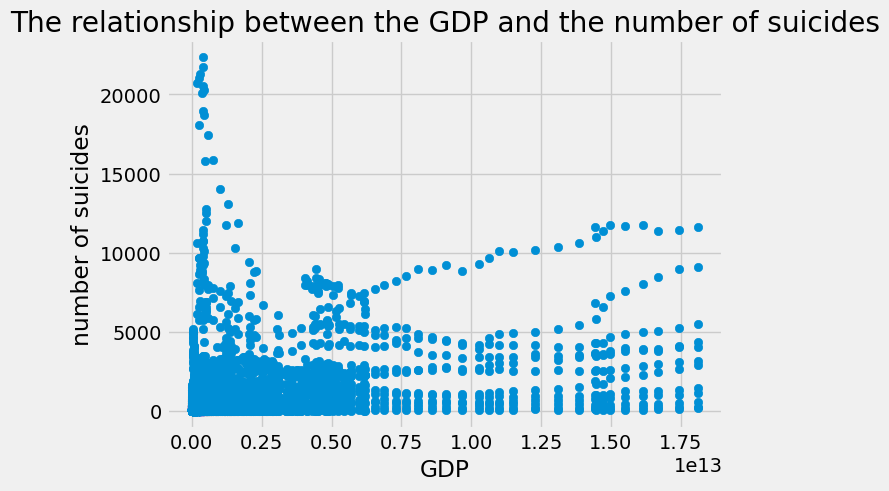

In [46]:
plt.scatter(df['gdp_for_year ($)'], df["suicides_no"])
plt.title("The relationship between the GDP and the number of suicides")
plt.xlabel("GDP")
plt.ylabel("number of suicides");

<a id='conclusions'></a>
## Conclusions

> **First**: The top three countries in total suicides numbers are Russia, the United States and Japan, and the three countries with the lowest number of suicides are Dominica, Saint Kitts and Nevis and San Marino.

> **Second**: The highest years in the total number of suicides are 1999, 2001, 2002, and 2003. 

> **Third**: The largest number of suicide cases was for people aged 35 to 54, then for people aged 55 to 74, then for people between 25 and 34.

> **Fourth**: The top 3 generations in the number of suicides are the Boomers generation, then the G-I generation, then the Silent generation.

> **Fifth**: Although suicides in countries with low GDP are slightly higher than in other countries, this is not at all enough to claim that high GDP reduces the number of suicides, because there are many countries with high GDP and at the same time, they have a high number of suicides, as in the case of United States of America.

## Power bi dashboard

We will create a dashboard using power bi and to create interesting and insert a picture of it down here 

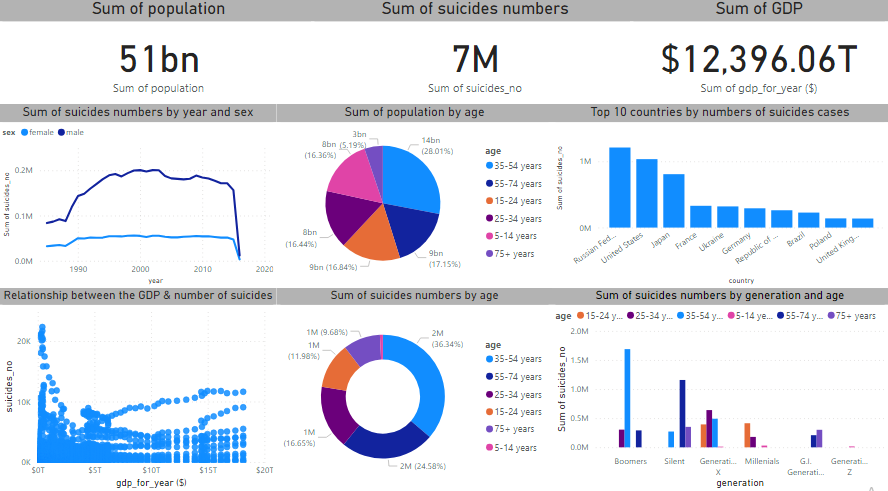